# NIN
## 引入包

In [30]:
import sklearn

ModuleNotFoundError: No module named 'sklearn'

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import data
import numpy


In [2]:
trainset = data.dataset(root='../../../datasets/nin-cifar10/data', train=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
        shuffle=True, num_workers=2)

testset = data.dataset(root='../../../datasets/nin-cifar10/data', train=False)
testloader = torch.utils.data.DataLoader(testset, batch_size=100,
        shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
        'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [42]:
(trainset.train_data)[0]

tensor([[[-0.5105, -1.0191, -0.9810,  ...,  0.4352,  0.3805,  0.3362],
         [-1.5402, -1.7692, -1.3875,  ..., -0.0220,  0.0519,  0.3911],
         [-1.0316, -1.1760, -0.4642,  ..., -0.1015,  0.3603,  0.1245],
         ...,
         [ 0.5421,  0.9479,  0.8220,  ...,  1.0986, -1.9432, -1.1702],
         [-0.3033, -0.0264,  0.4937,  ...,  2.0422, -0.8286, -0.5970],
         [-0.5564, -0.6619, -0.3158,  ...,  2.4142,  0.2464, -0.2157]],

        [[ 0.2855, -0.0919, -0.1770,  ...,  0.4880,  0.3146,  0.3147],
         [-0.5894, -0.8748, -0.8470,  ..., -0.2571, -0.3205, -0.0981],
         [-0.2747, -0.6235, -0.3645,  ..., -0.2103,  0.0466, -0.3351],
         ...,
         [ 0.7359,  0.8163,  1.3671,  ...,  1.2882, -1.7329, -0.7816],
         [-0.4813, -0.4628,  0.6276,  ...,  1.7044, -1.1790, -0.7906],
         [-0.5240, -0.7635, -0.1903,  ...,  2.1989, -0.0910, -0.5513]],

        [[ 0.9863,  0.5960,  0.4185,  ...,  0.7046,  0.5501,  0.5442],
         [ 0.1572,  0.0738, -0.1402,  ..., -0

In [46]:
i = iter(testloader)

images, labels = i.next()
# print(images, labels)
print(images.shape)

torch.Size([100, 3, 32, 32])


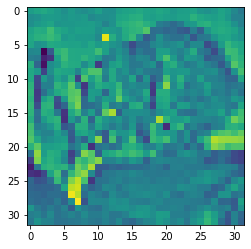

[[[ 0.35635585 -0.13482472 -0.40354836]
  [ 0.49133256 -0.05769973 -0.36376235]
  [ 0.60578823  0.12442518 -0.27586895]
  ...
  [ 0.30378968 -0.05809663 -0.07824308]
  [-0.14917944 -0.11592975  0.0599856 ]
  [-0.4824359  -0.27697232  0.01771795]]

 [[-0.01659418 -0.02421079 -0.12542836]
  [ 0.06572778  0.10140809 -0.54649836]
  [ 0.28305733  0.22247946 -0.30612114]
  ...
  [ 0.2188731  -0.10504446 -0.5612055 ]
  [-0.2609645  -0.1687802  -0.29397586]
  [-0.29181963 -0.04968872  0.08261976]]

 [[ 0.03179617 -0.01819651 -0.30142966]
  [ 0.25328004  0.22817463 -0.8080871 ]
  [ 0.3581821   0.19161798 -0.6527158 ]
  ...
  [ 0.5024385   0.0910509  -0.54601467]
  [ 0.09447164  0.07722138 -0.3056373 ]
  [-0.2864837  -0.06278332 -0.13910195]]

 ...

 [[ 0.18119761  0.6955099   1.2686528 ]
  [-0.46720585  0.07758817  0.27980942]
  [-0.7133305  -0.18890585  0.1464783 ]
  ...
  [-0.24724226  0.373715    0.7526865 ]
  [-1.0553173  -0.8347065  -0.70281833]
  [ 0.09734201  0.06501298  0.2888296 ]]

 [

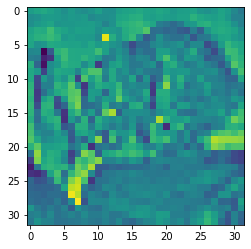

cat


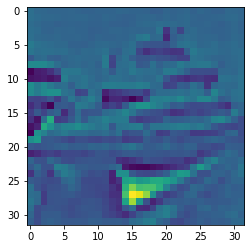

[[[ 0.20680521  0.04492816  0.01417435]
  [ 0.11294898 -0.02330448 -0.04032303]
  [ 0.09819305 -0.01842631 -0.02064206]
  ...
  [ 0.11291568 -0.02167727  0.04357852]
  [ 0.09759666 -0.04524234 -0.03059408]
  [ 0.05621098 -0.08264218 -0.0997432 ]]

 [[ 0.20879321  0.06961545  0.06080011]
  [ 0.15447576  0.04180822  0.03354446]
  [ 0.1033005   0.0207238   0.02686718]
  ...
  [ 0.11608841  0.04146845  0.10935828]
  [ 0.14224577  0.04298907  0.07095028]
  [ 0.0809796  -0.03431423 -0.05564512]]

 [[ 0.17048779  0.05334675  0.06658637]
  [ 0.09989777  0.02210592  0.00536378]
  [ 0.05323186  0.00543464 -0.00629677]
  ...
  [ 0.04556093 -0.00658936  0.03144644]
  [ 0.10593987  0.01072024  0.03006603]
  [ 0.03510033 -0.08168192 -0.11088101]]

 ...

 [[ 0.19655947  0.3963848   0.35316414]
  [-0.29371148 -0.21842362 -0.42534566]
  [-0.20874095 -0.21443865 -0.35440776]
  ...
  [ 0.01798163  0.18539158  0.23513374]
  [ 0.08237313  0.22586265  0.28260908]
  [ 0.08682981  0.20604272  0.36092916]]

 [

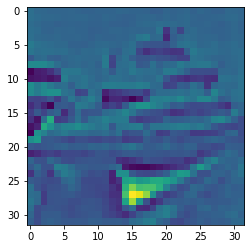

ship


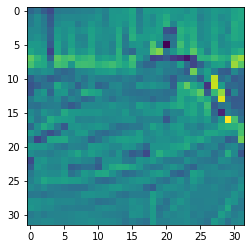

[[[-0.48487598 -0.02961113  0.3522087 ]
  [-0.30289584  0.01736931  0.36385092]
  [-0.6164671  -0.3801878  -0.16954564]
  ...
  [ 0.10292359  0.01008692 -0.14828546]
  [ 0.29624462  0.14502245  0.02155051]
  [ 0.37112185  0.27052593  0.1921876 ]]

 [[-0.24507433  0.12199404  0.41179824]
  [-0.00477271  0.24041256  0.46747282]
  [-0.25187606 -0.0751359   0.08129118]
  ...
  [ 0.07718493 -0.07928601 -0.11113757]
  [ 0.32643163  0.15499438  0.09855615]
  [ 0.381469    0.25210226  0.17496331]]

 [[-0.20003137  0.0863818   0.27057204]
  [-0.01095621  0.17026879  0.32178852]
  [-0.20090336 -0.06474255  0.04223146]
  ...
  [-0.03290983 -0.15300144 -0.16822134]
  [ 0.4392851   0.30894002  0.23338947]
  [ 0.32232726  0.14822435  0.1058389 ]]

 ...

 [[ 0.13640039 -0.09419784 -0.32322735]
  [ 0.06897974 -0.10903    -0.28999943]
  [-0.03835334 -0.21451198 -0.34019864]
  ...
  [ 0.37161377  0.11832096  0.20153809]
  [-0.27563077 -0.45893124 -0.58845073]
  [-0.24531329 -0.47063592 -0.71052194]]

 [

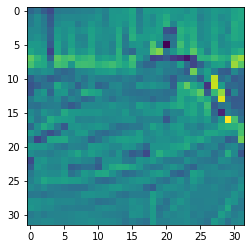

ship


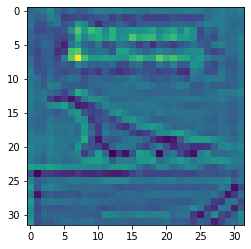

[[[-0.08795771 -0.24544181 -1.0785654 ]
  [ 0.05943193  0.19912137  0.14774942]
  [ 0.1393671  -0.09661117 -0.10147992]
  ...
  [ 0.12906565 -0.20361039  0.1558091 ]
  [ 0.18021409  0.16997808  0.47372815]
  [ 0.3013237  -0.11296928 -0.87516975]]

 [[ 0.01982432 -0.14906225 -0.6901148 ]
  [-0.1240225   0.24856539  0.6175792 ]
  [-0.13375835 -0.00232314  0.5545756 ]
  ...
  [ 0.07411357  0.19490772  0.3040849 ]
  [ 0.05660933  0.55226475  0.70127463]
  [ 0.11884069  0.16054973 -0.47734094]]

 [[ 0.13837686 -0.21955717 -1.0115875 ]
  [-0.32371977  0.08941168  0.23007402]
  [-0.36614782 -0.07328495  0.24306637]
  ...
  [ 0.07076653 -0.0088787  -0.39698893]
  [-0.0495138   0.3754452   0.24848591]
  [-0.00566518  0.0693178  -0.62562346]]

 ...

 [[ 0.47082546 -0.02078778 -0.37880522]
  [-0.4847145  -0.7567751  -0.5752912 ]
  [-0.1222773  -0.16982725 -0.10400244]
  ...
  [ 0.12615351  0.92808145  0.38562164]
  [-0.94318974 -0.6057325  -1.0712516 ]
  [-0.2473456  -0.40869024 -1.0534897 ]]

 [

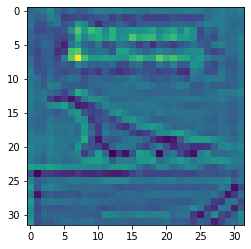

plane


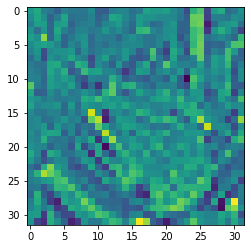

[[[ 0.31857428 -0.8213036  -0.6735964 ]
  [ 0.6772634   0.11402263  0.37246382]
  [-0.21997616 -0.4049445  -0.20122515]
  ...
  [-0.60240346 -0.8437106  -0.9732226 ]
  [-0.3964768  -0.13977021 -0.16790324]
  [ 0.16543594  0.2863821   0.37622583]]

 [[ 0.08736748 -0.5298928  -0.6228491 ]
  [ 0.59122163  0.8609994   0.8835063 ]
  [ 0.09623361 -0.2840129   0.06780762]
  ...
  [-0.38905358 -1.0544332  -0.8593235 ]
  [ 0.14489977  0.5007915   0.6250018 ]
  [-0.01242409 -0.00230467  0.5252988 ]]

 [[-0.23515028 -0.09100486 -0.25532204]
  [ 0.47368118  0.8334615   0.80378824]
  [ 0.42772537  0.14527647  0.45257527]
  ...
  [ 0.29792553  0.12677285  0.25930178]
  [ 0.43638313  0.73670757  0.84710205]
  [-0.46837115 -1.1183506  -0.07446188]]

 ...

 [[-0.1284591   0.51764774  0.38364595]
  [ 0.36736172  0.99892133  0.8162806 ]
  [-0.3153268  -0.41626316 -0.3073341 ]
  ...
  [ 1.3335088   1.5849845  -0.14895551]
  [ 1.8297739   2.2417586   0.49594897]
  [ 0.18031566 -0.17522486 -0.4016848 ]]

 [

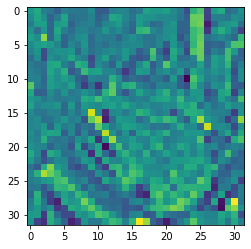

frog


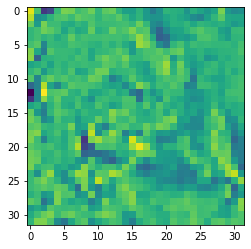

[[[ 1.7683011e+00  5.2329975e-01 -1.3699565e-02]
  [ 4.3323433e-01  4.5906866e-01 -1.1048934e-01]
  [-2.4703994e+00 -1.3923383e+00 -1.1986006e+00]
  ...
  [-4.7432935e-01 -3.7991402e-01 -1.4970602e-01]
  [-7.6889068e-01 -3.8432828e-01 -1.2453627e-01]
  [-6.5763479e-01 -4.0522486e-01 -1.4531393e-01]]

 [[ 1.4163325e+00  7.8104907e-01  5.0159246e-01]
  [-6.7710346e-01 -6.3235343e-01 -1.0551627e+00]
  [-4.9863219e-01  2.1121942e-04 -1.6907169e-01]
  ...
  [-1.3754334e-01 -7.9823337e-02  7.4690193e-02]
  [-2.1103099e-01  7.0198432e-02  2.6924056e-01]
  [-2.0044518e-01 -7.9387547e-03  1.3103564e-01]]

 [[ 7.5080180e-01  5.8362913e-01  4.3470353e-01]
  [-4.1869012e-01 -5.2845472e-01 -7.0717722e-01]
  [ 8.9834493e-01  9.2734510e-01  5.2455670e-01]
  ...
  [-1.2167316e-01 -4.0809389e-02  1.1214005e-01]
  [-4.4895798e-01 -3.0642688e-01 -2.0071118e-01]
  [-2.6283953e-01 -2.9520199e-01 -1.1161337e-01]]

 ...

 [[-4.2453864e-01 -8.7417388e-01 -8.0855882e-01]
  [-9.4016843e-02 -2.6463643e-01  1.920

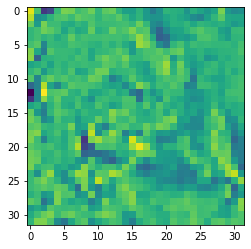

frog


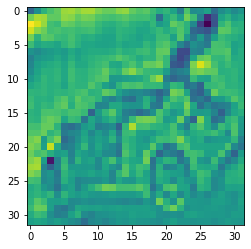

[[[-1.1362244  -0.8130599   0.37472966]
  [-0.40327772 -0.5685334   0.09429991]
  [ 0.26975784 -0.57641876 -0.05825669]
  ...
  [-0.1627258  -0.49225304 -0.08474128]
  [-0.48685    -0.19302377  0.03876326]
  [-0.27667513 -0.26124844  0.04380533]]

 [[ 0.9329234  -0.055571   -0.1588414 ]
  [ 1.2961204   0.02380951 -0.21330489]
  [ 1.2331936   0.13904601 -0.3550356 ]
  ...
  [ 0.25652227 -0.2507207  -0.11016652]
  [-0.12598754 -0.06138576 -0.07866301]
  [ 0.02785193 -0.24267906  0.04930982]]

 [[ 1.8711503  -0.06854271 -0.66380906]
  [ 1.5741827  -0.25422972 -0.6895435 ]
  [ 1.1769248  -0.03065186 -0.67069286]
  ...
  [ 0.6029913  -0.28341568 -0.23896162]
  [ 0.17068337 -0.20418914 -0.19264787]
  [ 0.21937409 -0.24226514  0.05369299]]

 ...

 [[ 0.40438098 -0.15269855 -0.05259456]
  [ 0.83834624 -0.1473815   0.02770334]
  [ 0.80521953 -0.08392788  0.04997681]
  ...
  [-0.30269155  0.04514362 -0.12193131]
  [-0.28817365  0.18285549  0.02467309]
  [-0.11238083  0.12421259  0.10852936]]

 [

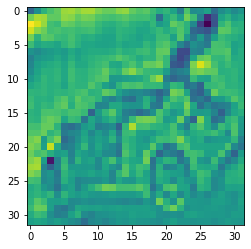

car


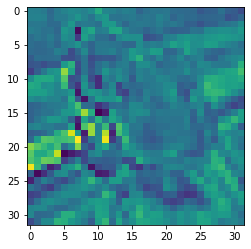

[[[ 0.02972121  0.17604834  0.0039128 ]
  [ 0.01774983  0.22989741  0.01220894]
  [-0.06201396  0.17104098 -0.03981371]
  ...
  [-0.36527586 -0.21323474 -0.08428358]
  [-0.40636757 -0.36137244 -0.22244467]
  [-0.57043767 -0.4804629  -0.31603053]]

 [[ 0.03534092  0.17589028  0.02305778]
  [ 0.04636778  0.19782862  0.0754495 ]
  [ 0.02828128  0.21300925  0.10177822]
  ...
  [-0.5278642  -0.44785097 -0.32879287]
  [-0.442446   -0.3988699  -0.2998271 ]
  [-0.28970444 -0.35582924 -0.15932703]]

 [[-0.09316993  0.06996781 -0.03918906]
  [-0.07909562  0.02336942  0.01825135]
  [-0.10700094  0.09233472  0.04532176]
  ...
  [-0.13344812 -0.18278493 -0.01415034]
  [-0.07329156 -0.05664486  0.02247829]
  [ 0.16432573  0.00447233  0.20537402]]

 ...

 [[ 0.08236184  0.6086848   0.6050472 ]
  [ 0.13144827  0.47288185  0.46982485]
  [ 0.14114508  0.21325985  0.2234408 ]
  ...
  [ 0.43926015 -0.40237966  0.03277447]
  [-0.04708171 -0.40817878 -0.18127704]
  [-0.0052172  -0.05130551  0.10568278]]

 [

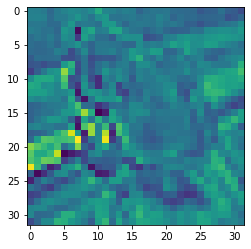

frog


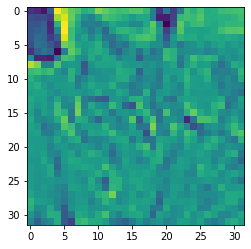

[[[-1.5343759  -1.1132194  -0.17014918]
  [-1.6665316  -0.76879436  0.32014078]
  [-1.957936   -1.3707848  -0.5013338 ]
  ...
  [ 0.7243155  -0.27067262 -0.16850755]
  [ 0.73559344 -0.4488748  -0.34989908]
  [ 0.7886825  -0.39667052 -0.4564089 ]]

 [[-1.1734895  -0.81286687 -0.05986565]
  [-1.2547977  -0.57666886  0.27159566]
  [-1.1739835  -0.6876254  -0.00365017]
  ...
  [ 0.45746166 -0.01438596 -0.22115692]
  [ 0.543518   -0.16897975 -0.36676747]
  [ 0.6829484  -0.00602255 -0.305497  ]]

 [[-1.0716934  -0.79617023 -0.15128066]
  [-1.0628462  -0.58038765  0.08353252]
  [-0.86304384 -0.45281047  0.12840568]
  ...
  [ 0.5807294  -0.0287714  -0.23171979]
  [ 0.54727495 -0.1458887  -0.26403457]
  [ 0.5938896  -0.1905576  -0.47329086]]

 ...

 [[ 0.44949752  0.61701304  0.44690937]
  [-0.15740065 -0.00737318 -0.2663137 ]
  [-0.12343629  0.07348166 -0.31252736]
  ...
  [ 0.01606371 -0.14865024  0.04051849]
  [-0.04615927 -0.26434836 -0.0788095 ]
  [-0.37409127 -0.6451293  -0.4177037 ]]

 [

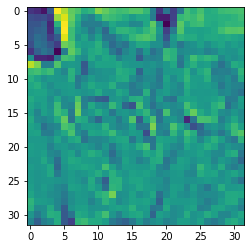

cat


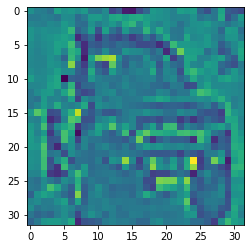

[[[ 2.09485441e-01  1.22068897e-01  1.77880257e-01]
  [-8.78880359e-03 -1.13236964e-01 -3.70615199e-02]
  [-4.25035805e-02  9.00438800e-02 -3.85957956e-01]
  ...
  [-4.57228422e-01 -1.94808580e-02 -5.41797400e-01]
  [-5.38931668e-01 -2.96254978e-02 -6.12448394e-01]
  [-6.37661159e-01 -6.99275792e-01 -7.72442043e-01]]

 [[-7.61246458e-02  1.47621974e-01 -2.24136978e-01]
  [-8.30439329e-02  8.52969140e-02 -1.72541827e-01]
  [ 1.29459449e-03  2.67262459e-01 -1.59695894e-01]
  ...
  [-5.61103106e-01 -3.83353561e-01 -5.22507071e-01]
  [-2.23259270e-01 -1.65026709e-01 -2.65380234e-01]
  [ 3.21975470e-01 -2.73359660e-02  1.54580042e-01]]

 [[ 5.56717478e-02  8.85425955e-02  7.83301368e-02]
  [ 1.68681461e-02  6.36524409e-02  4.23198864e-02]
  [-2.29099747e-02  1.40890807e-01 -1.08367316e-02]
  ...
  [-1.67982250e-01 -6.47280067e-02 -5.41418046e-02]
  [ 2.15275642e-02 -5.65304644e-02  1.77719906e-01]
  [ 1.44076496e-01 -6.31461740e-02  7.09917247e-02]]

 ...

 [[ 1.75954953e-01  5.09584732e-02

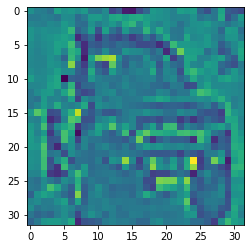

car


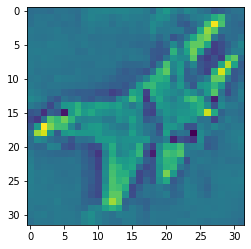

[[[-0.3428323  -0.0218618   0.036211  ]
  [-0.31017962  0.0031278   0.07481745]
  [-0.31823102 -0.00904628  0.09957759]
  ...
  [-0.42149246 -0.03492932  0.00360597]
  [-0.27348644  0.0025316   0.03584126]
  [-0.25194317  0.08484547 -0.04286256]]

 [[-0.3172132  -0.02220972  0.1075384 ]
  [-0.18758291 -0.00593379  0.03833178]
  [-0.21680064 -0.02359122  0.0547368 ]
  ...
  [-0.18206947 -0.17621775 -0.24923995]
  [-0.3917628  -0.18866873 -0.05355932]
  [-0.3318778   0.04660724  0.26426664]]

 [[-0.2814859  -0.00587611  0.04956954]
  [-0.16617656 -0.02306788  0.02405871]
  [-0.1707287  -0.0316825  -0.03982303]
  ...
  [-0.2856943  -0.5427032  -0.6736561 ]
  [-0.40398923 -0.23569074 -0.02861938]
  [-0.50864047 -0.03319506  0.246057  ]]

 ...

 [[-0.13366221  0.08033594  0.07267234]
  [-0.20835479 -0.06084121 -0.02364015]
  [-0.18545051 -0.00984678  0.08237404]
  ...
  [-0.12521702 -0.09412537  0.16139446]
  [-0.1655533  -0.13879226  0.1274189 ]
  [-0.23001008 -0.08803583  0.18506283]]

 [

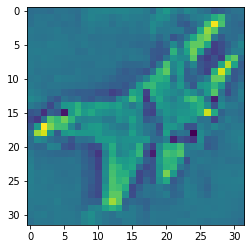

plane


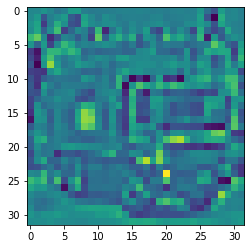

[[[ 0.17055517  0.04248345 -0.06188743]
  [ 0.17872263  0.1558091   0.05475457]
  [ 0.35757527  0.34221122  0.25137174]
  ...
  [ 0.10387133  0.23874435  0.13779674]
  [ 0.17426236  0.24793361  0.13629855]
  [ 0.04949161  0.14524543  0.00267849]]

 [[ 0.20122652  0.20648624  0.07356238]
  [ 0.43531266  0.48083124  0.38662198]
  [-0.59411025 -0.6520381  -0.6425388 ]
  ...
  [ 0.14580117  0.37958178  0.29045495]
  [ 0.17023684  0.2880928   0.17632969]
  [ 0.05997391  0.15652542  0.04633991]]

 [[ 0.3271827   0.43004072  0.2702389 ]
  [ 0.61262393  0.7269984   0.6547214 ]
  [-0.9049908  -1.0482888  -1.041035  ]
  ...
  [ 0.19523332  0.58305526  0.6057327 ]
  [ 0.07593372  0.29896653  0.26131478]
  [ 0.04230649  0.16776323  0.17630838]]

 ...

 [[ 0.23103838  0.18312426  0.43127584]
  [-0.18484105 -0.12355983  0.08263902]
  [-0.13024756 -0.05338052  0.11950321]
  ...
  [ 0.05573867  0.0318909  -0.01561395]
  [ 0.12890165 -0.05036823 -0.02259749]
  [ 0.06195965 -0.3333382  -0.16389456]]

 [

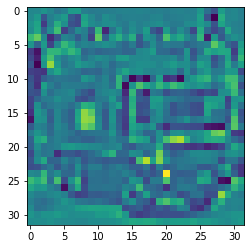

truck


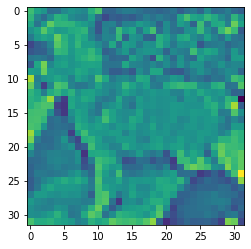

[[[ 0.77025056  0.02931153 -0.8467753 ]
  [ 0.33695546 -0.2649593  -0.8231298 ]
  [ 0.12506971 -0.01299781  0.1373283 ]
  ...
  [-0.2466989  -0.357424    0.27581072]
  [-0.5622019  -0.51984656 -0.04198493]
  [-0.6903007  -0.5526494  -0.17725302]]

 [[ 0.6369083  -0.11361678 -0.6587489 ]
  [-0.1503341  -0.58945787 -0.8615214 ]
  [-0.51337117 -0.38770273 -0.36022398]
  ...
  [-0.35384947 -0.74713856 -0.625476  ]
  [ 0.6103006   0.35027313  0.29509926]
  [ 0.06392846 -0.01450513  0.10256675]]

 [[ 0.39864102 -0.21445756 -0.45601034]
  [-0.4035062  -0.59452283 -0.71951133]
  [ 0.20468432  0.36842117  0.3247296 ]
  ...
  [-0.22062248 -0.69860154 -0.7985511 ]
  [ 1.079403    0.79064983  0.42097282]
  [ 0.33889717  0.25999483  0.26093048]]

 ...

 [[ 0.03254298 -0.12164089  0.16722487]
  [-0.12726854 -0.221211    0.0144161 ]
  [-0.20788537 -0.12835622  0.04839589]
  ...
  [-0.49950388 -0.21803772  0.03895434]
  [-0.904588    0.02453229 -0.3811541 ]
  [-0.54211485 -0.1944438   0.518458  ]]

 [

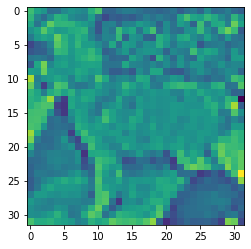

dog


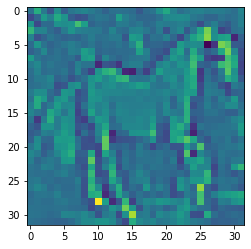

[[[-1.04778670e-01 -1.13508373e-01 -8.22478533e-02]
  [ 8.83913457e-01  8.73323381e-01  7.70802855e-01]
  [-3.44538596e-04  5.85814491e-02 -9.97951552e-02]
  ...
  [-4.89861928e-02 -2.09661305e-01 -1.64893672e-01]
  [-1.56931356e-01 -3.07378352e-01 -1.71961844e-01]
  [ 1.79706693e-01 -6.99517429e-02  6.45241216e-02]]

 [[-7.45301723e-01 -7.85273492e-01 -6.93181694e-01]
  [-3.01706463e-01 -3.23804915e-01 -4.13431227e-01]
  [ 5.26767850e-01  5.00410736e-01  4.12177622e-01]
  ...
  [-2.16427624e-01 -2.95434207e-01 -2.34892190e-01]
  [-1.34087339e-01 -2.02528223e-01 -1.02470279e-01]
  [ 1.11900903e-01 -2.16050949e-02  1.11807741e-01]]

 [[ 4.89566267e-01  5.16571701e-01  4.84930784e-01]
  [-7.31991112e-01 -7.29575574e-01 -7.64277756e-01]
  [-2.29036272e-01 -2.34105632e-01 -2.97314107e-01]
  ...
  [-4.75709945e-01 -4.92146850e-01 -4.93596315e-01]
  [-1.61717176e-01 -1.76959813e-01 -2.10594893e-01]
  [ 1.24069668e-01  1.01104282e-01  1.54225454e-01]]

 ...

 [[-9.76893231e-02 -4.30343896e-02

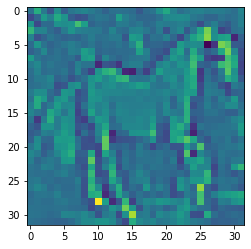

horse


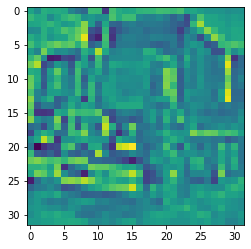

[[[ 3.64800096e-01  2.42301121e-01 -1.03308249e+00]
  [-1.01463042e-01 -6.01573050e-01 -1.88756776e+00]
  [ 5.98628759e-01  5.05121768e-01 -1.16956699e+00]
  ...
  [-8.02292749e-02 -6.80022389e-02  2.81013459e-01]
  [ 2.45774863e-03 -2.54044943e-02  4.34518218e-01]
  [ 1.25463838e-02 -4.64978144e-02  4.86726582e-01]]

 [[ 7.98536658e-01  9.44996953e-01 -8.01864922e-01]
  [ 4.91063684e-01  3.90057296e-01 -1.23842180e+00]
  [ 5.42672932e-01  6.28055632e-01 -8.12860489e-01]
  ...
  [ 9.62684080e-02  5.48402816e-02  2.37032115e-01]
  [ 2.59331644e-01  1.80849075e-01  4.87458795e-01]
  [ 1.80036053e-01  8.26418102e-02  5.16728342e-01]]

 [[ 3.85457784e-01  7.05155551e-01 -1.83447063e-01]
  [ 4.18113351e-01  6.01176023e-01 -9.80544090e-01]
  [ 6.07927561e-01  8.62983763e-01 -5.88404477e-01]
  ...
  [ 1.58499047e-01  5.46716489e-02  1.87621117e-01]
  [ 3.23741466e-01  1.81622639e-01  4.06385660e-01]
  [ 3.01550776e-01  1.55487314e-01  5.30403137e-01]]

 ...

 [[ 5.62318973e-02 -4.82077748e-02

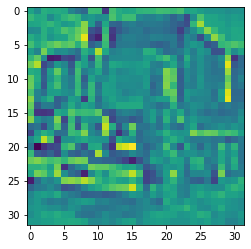

truck


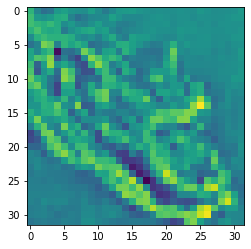

[[[ 0.7613487   0.32027146  0.5204372 ]
  [-0.36947682 -0.3426947  -0.2776906 ]
  [-0.8622565  -0.31799576 -0.3697388 ]
  ...
  [-0.11234571  0.07833435 -0.20005377]
  [-0.07024042  0.12732385 -0.01495412]
  [ 0.12223019  0.36959028  0.23465495]]

 [[ 0.99736285  0.3597295   0.6123193 ]
  [ 0.09118553 -0.24694636 -0.06449052]
  [-0.04701217 -0.08182219  0.07745669]
  ...
  [-0.03638639  0.13771638 -0.07294429]
  [ 0.04220388  0.22865319  0.01324514]
  [ 0.06590156  0.25035644  0.09749038]]

 [[ 1.0094326   0.3909963   0.61201614]
  [ 0.79768604  0.1985965   0.53161544]
  [ 0.63698274  0.12324643  0.5044616 ]
  ...
  [-0.04083402  0.1067399  -0.07461559]
  [-0.0675717   0.08796858 -0.11597826]
  [-0.0558458   0.06013561 -0.06630508]]

 ...

 [[-0.5365369   0.35599992 -0.00953501]
  [-0.47092628  0.17779383 -0.04264032]
  [-0.3713695   0.21388954  0.08773915]
  ...
  [ 0.1936792  -2.1395907  -1.2700846 ]
  [ 0.20943305 -1.8494512  -0.53913534]
  [-0.42589206 -1.0757943  -0.02268775]]

 [

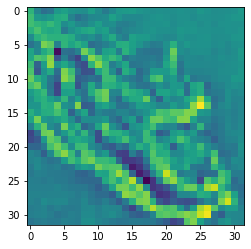

ship


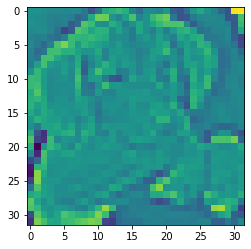

[[[ 0.0495249  -0.3028936  -0.22943772]
  [ 0.04986404 -0.1321507  -0.09993938]
  [-0.05521501 -0.12421232 -0.12523462]
  ...
  [-0.9913307  -0.9340923  -1.0723804 ]
  [ 1.9644603   2.3104503   2.139518  ]
  [ 2.0406241   2.315291    2.0569036 ]]

 [[-0.02622616 -0.341136   -0.21746927]
  [-0.06446475 -0.14886537 -0.10529383]
  [-0.1354205  -0.12042054 -0.08925074]
  ...
  [-0.9564788  -0.77871615 -0.8115683 ]
  [-0.84976697 -0.7109734  -0.5962391 ]
  [ 0.8272475   0.9550544   1.128896  ]]

 [[ 0.02898352 -0.26539636 -0.19264486]
  [-0.04114918 -0.10756867 -0.06994   ]
  [-0.12019371 -0.09176466 -0.03793347]
  ...
  [-0.27530834 -0.33327115 -0.43818054]
  [-0.9276473  -0.90317136 -0.62655306]
  [ 0.6818787   0.96370554  1.3446525 ]]

 ...

 [[ 0.897726    0.72186774  0.37552327]
  [ 0.66215616  0.14063956 -0.26476076]
  [ 0.07658499 -0.4234287  -0.45345658]
  ...
  [ 0.6133875   0.7999235   0.94147915]
  [ 0.12521985  0.31481212  0.27869204]
  [-1.2586404  -1.3980992  -1.2037781 ]]

 [

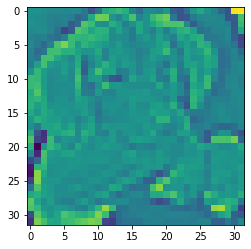

dog


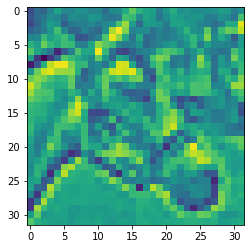

[[[-1.2414806   0.36204487  0.46092427]
  [-0.7524392   0.5954633   0.9269356 ]
  [-0.90562963 -0.01559983  0.3867998 ]
  ...
  [-0.00894293  0.0493843  -0.1906791 ]
  [-0.48859048 -0.6654943  -0.56093925]
  [-0.24718392 -0.51881874 -0.21154444]]

 [[-1.1085482   0.55148244  0.40569448]
  [-0.77226716  0.6040845   0.6417855 ]
  [-0.62049174  0.35665464  0.4428653 ]
  ...
  [-0.28693637 -0.3183073  -0.4352156 ]
  [-0.6150195  -0.8275236  -0.8097303 ]
  [ 0.599856    0.2878292   0.54834044]]

 [[-1.28807     0.16167265  0.0290126 ]
  [-0.907712    0.2356934   0.32529795]
  [-0.43877456  0.3748097   0.41109383]
  ...
  [ 0.21909356  0.18769892  0.12244677]
  [ 0.20008118 -0.00313831  0.07055942]
  [ 1.5243112   1.2174433   1.330493  ]]

 ...

 [[-1.4933295  -1.7906562  -2.1222005 ]
  [ 1.188672    1.5708685   1.2204707 ]
  [ 0.47768423  0.90889275  0.7281699 ]
  ...
  [ 0.14349975  0.20862131  0.11027509]
  [ 0.1983231   0.21946976 -0.0099389 ]
  [ 0.1964632   0.184066   -0.15483531]]

 [

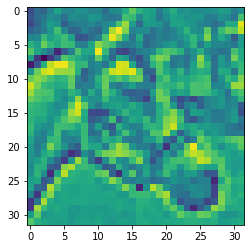

horse


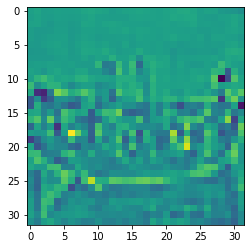

[[[ 0.07215969 -0.06692342  0.13550763]
  [ 0.11016411 -0.00920352  0.07892131]
  [ 0.05332698 -0.00992764 -0.02720224]
  ...
  [-0.00704961 -0.07032391  0.15334041]
  [-0.02772471 -0.15909278  0.14603908]
  [-0.08397067 -0.22883439  0.16233397]]

 [[ 0.05791363 -0.07037998  0.16834861]
  [ 0.09326156 -0.01194342  0.1042826 ]
  [ 0.04864997  0.0075717   0.05851501]
  ...
  [ 0.07418559  0.0563895   0.04652471]
  [ 0.11340755  0.04342284  0.06868328]
  [ 0.06504428 -0.05618965  0.04385004]]

 [[ 0.08481829 -0.0705184   0.18143807]
  [ 0.08927862 -0.00618441  0.09101909]
  [ 0.04192282  0.02225137  0.09080807]
  ...
  [ 0.07802702  0.11033911 -0.05356418]
  [ 0.12099343  0.07083984 -0.0081211 ]
  [ 0.0523492  -0.02547247 -0.06227734]]

 ...

 [[ 0.0492648  -0.41626203 -0.5113746 ]
  [-0.30949736 -0.6131509  -0.681923  ]
  [ 0.3011973   0.2929783   0.55082023]
  ...
  [-0.23272485 -0.00541774 -0.13517825]
  [-0.43878812 -0.12239349 -0.20017147]
  [ 0.00886932  0.39107743  0.5128465 ]]

 [

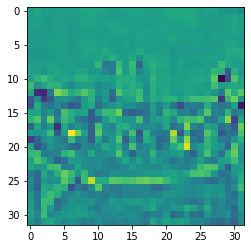

ship


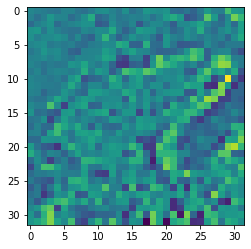

[[[ 0.02014158 -0.14447449  0.18871933]
  [-0.07659957 -0.30951938  0.17493385]
  [-0.14101115 -0.41628888  0.21527597]
  ...
  [ 1.0888544   0.39636585 -0.07037984]
  [ 0.36925957 -0.18372732 -0.5468285 ]
  [ 0.2954669  -0.338769   -0.3887982 ]]

 [[-0.05445172 -0.27149132  0.13622662]
  [-0.35786614 -0.59939665 -0.08818615]
  [-0.11848915 -0.39944428  0.12037607]
  ...
  [ 0.08105493 -0.22808382 -0.2399149 ]
  [ 1.4537148   0.8763126   0.23578289]
  [ 0.9237656   0.25543508 -0.40044993]]

 [[-0.45649108 -0.6058615  -0.37814507]
  [-0.09927458 -0.25974467 -0.18378837]
  [ 0.05414002  0.1693832   0.03683505]
  ...
  [ 0.19100791  0.08525038 -0.51745325]
  [-0.4447636  -1.0113158  -1.3171276 ]
  [ 0.47593895 -0.07700931 -0.59499943]]

 ...

 [[ 0.03457316  0.13237423  0.13689804]
  [ 0.2931885   0.33071974 -0.12429298]
  [ 1.0755507   0.41179898 -0.42826775]
  ...
  [ 0.27767876  0.3847467  -0.79666996]
  [ 0.34627032 -0.00697082  0.19501114]
  [-0.22001328 -0.53367037 -0.5472288 ]]

 [

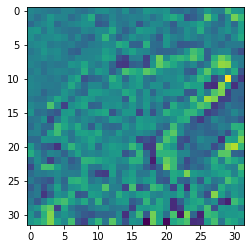

frog


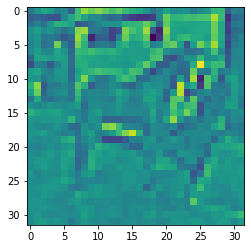

[[[-0.42640358 -0.7859116  -0.40845314]
  [ 0.01395308 -0.27088192  0.11047913]
  [ 0.35829672  0.16751555  0.49984357]
  ...
  [-0.84407234 -0.94044673 -1.0121908 ]
  [-0.25382897 -0.4172051  -0.45245448]
  [-0.3854747  -0.5943468  -0.5512806 ]]

 [[-0.7866744  -1.279146   -0.7322082 ]
  [-0.65985876 -1.158263   -0.7018792 ]
  [-0.80245906 -1.2276341  -0.88872445]
  ...
  [-1.4029276  -1.489392   -1.558096  ]
  [-0.60069144 -0.68483984 -0.7318157 ]
  [-0.5508652  -0.7119939  -0.6142361 ]]

 [[-0.5399639  -0.54548764 -0.5536438 ]
  [-0.22093911 -0.51446754 -0.34160948]
  [-0.55046576 -0.92482084 -0.7349626 ]
  ...
  [-1.2200227  -1.3022599  -1.3963455 ]
  [-0.3563273  -0.41804937 -0.45730072]
  [-0.3538002  -0.4575849  -0.4285499 ]]

 ...

 [[ 0.03710895  0.1995025  -0.12099762]
  [ 0.02378088  0.15059955 -0.06364965]
  [ 0.07117584  0.12328016  0.01052492]
  ...
  [ 0.10403567  0.04849079  0.77457947]
  [-0.2624327  -0.30673212  0.5833672 ]
  [-0.13411337 -0.30760255  0.56547403]]

 [

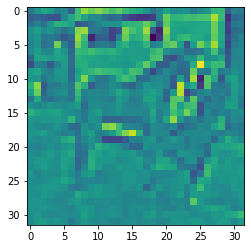

horse


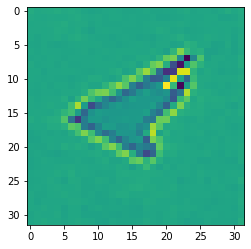

[[[ 0.12148516  0.10705958  0.05045361]
  [ 0.04917088  0.04254299 -0.01840024]
  [ 0.05680683  0.04595049 -0.00485045]
  ...
  [ 0.10507496  0.06138559  0.07643086]
  [ 0.02801453 -0.00959932 -0.01907392]
  [ 0.10403996  0.07253821  0.05695488]]

 [[ 0.05128376  0.05810518  0.00715953]
  [ 0.0243498   0.01740033 -0.01440505]
  [ 0.00886062  0.00489575 -0.02340674]
  ...
  [-0.04555276 -0.08261717 -0.06487519]
  [-0.03109382 -0.06013137 -0.08260895]
  [ 0.06718442  0.05372069  0.02916039]]

 [[ 0.03048133  0.04208359 -0.02015889]
  [ 0.04239158  0.02217631  0.01435737]
  [ 0.03635677  0.02549895  0.00414767]
  ...
  [ 0.01889029  0.0056242  -0.00068353]
  [ 0.03096116  0.03520139 -0.00657392]
  [ 0.07514445  0.08600644  0.04224038]]

 ...

 [[ 0.02957056  0.01299271  0.05483545]
  [ 0.01233681 -0.00130717  0.01367907]
  [ 0.05422068  0.0567535   0.05634978]
  ...
  [-0.00597543  0.04733872  0.06328194]
  [-0.05266929 -0.03540324 -0.02895825]
  [ 0.05543268  0.04405585  0.0468348 ]]

 [

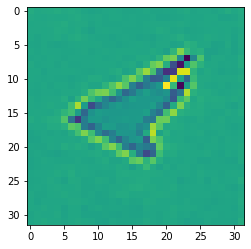

plane


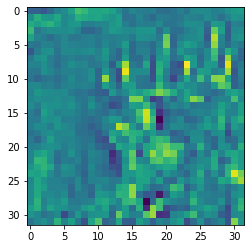

[[[-0.5904717  -0.65608823 -1.2362072 ]
  [-0.6150323  -0.3939845  -1.0546862 ]
  [-0.71475315 -0.3222437  -1.081717  ]
  ...
  [ 0.05977287  0.04533866 -0.13823397]
  [ 0.14619257 -0.02609495 -0.16829948]
  [ 0.20361766 -0.23269221 -0.5409437 ]]

 [[-0.00971442 -0.3686734   0.1452347 ]
  [ 0.4347269   0.33930135  0.6387833 ]
  [ 0.15426263  0.19172384  0.27839038]
  ...
  [-0.14795896 -0.01088982 -0.15177958]
  [ 0.06964529  0.04708758 -0.2631398 ]
  [ 0.01292862 -0.13440393 -0.47940335]]

 [[ 0.38642338 -0.05619314  0.8977966 ]
  [ 0.21749198  0.03806899  0.90418226]
  [ 0.39142326  0.20371792  0.8796024 ]
  ...
  [-0.59180254 -0.38423255 -0.513344  ]
  [-0.1731884  -0.12863351 -0.5017082 ]
  [-0.23356804 -0.30667984 -0.71295583]]

 ...

 [[ 0.20112015 -0.04058442 -0.18442099]
  [ 0.4240469   0.04440393  0.13854697]
  [-0.13911949 -0.7407209  -0.68566996]
  ...
  [-0.88043445 -0.59816605 -0.3972885 ]
  [-0.00751032 -0.40776324 -0.47067332]
  [ 0.54957557 -0.07330535 -0.1920586 ]]

 [

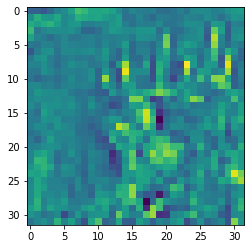

deer


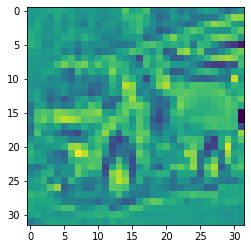

[[[-7.84008056e-02  1.57716557e-01  6.03334069e-01]
  [ 4.05001938e-02 -3.29490393e-01 -3.34454596e-01]
  [ 1.69606015e-01 -4.36582007e-02  3.60128842e-02]
  ...
  [-1.26321411e+00 -1.51889908e+00 -1.38043404e+00]
  [-6.81005955e-01 -6.98135138e-01 -6.23032629e-01]
  [-3.00604135e-01 -2.64718264e-01 -5.41315898e-02]]

 [[-1.20229237e-01 -9.15131941e-02  1.12026677e-01]
  [ 9.36992243e-02 -2.44770959e-01 -3.76091897e-01]
  [ 5.12998402e-02 -2.07095146e-02  1.99349057e-02]
  ...
  [ 9.11279082e-01  6.93869710e-01  4.12731886e-01]
  [ 1.70459020e+00  1.58508050e+00  1.23304307e+00]
  [ 1.67373371e+00  1.52682614e+00  1.17223775e+00]]

 [[-3.65596004e-02 -1.36565968e-01 -2.00082242e-01]
  [ 3.49009603e-01 -5.46130911e-03 -2.22651824e-01]
  [-1.64133981e-01 -1.21691376e-01 -9.72903967e-02]
  ...
  [ 1.15904582e+00  1.06862462e+00  5.72158515e-01]
  [ 1.11933134e-01 -1.44399889e-02 -5.24310112e-01]
  [-2.32784793e-01 -4.37207013e-01 -1.15760410e+00]]

 ...

 [[ 2.60580957e-01  2.67663956e-01

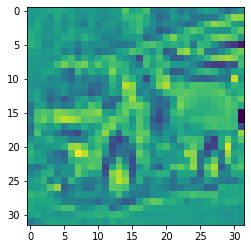

truck


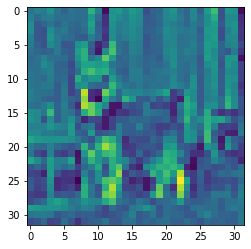

[[[-0.00192674 -0.5320158  -0.29123822]
  [ 0.22482692 -0.16600877  0.17730954]
  [ 0.12264719 -0.07596736  0.095947  ]
  ...
  [ 0.5683829   0.3546912   0.82798445]
  [ 0.4838087   0.34451842  0.2317808 ]
  [-1.3015599  -1.2761298  -1.0795592 ]]

 [[ 0.19861165 -0.28083953  0.153057  ]
  [-0.10456821 -0.3079974  -0.01535043]
  [ 0.09589595 -0.12660284  0.08552323]
  ...
  [ 0.3875504   0.1692638   0.48390552]
  [ 0.38701943  0.27965742 -0.04008365]
  [-0.95342207 -0.93991387 -0.8464421 ]]

 [[ 0.39360964 -0.07701111  0.35594818]
  [-0.37194785 -0.48415098 -0.37573192]
  [-0.19788218 -0.24511707 -0.2053061 ]
  ...
  [ 0.39389393  0.24115421  0.5911197 ]
  [ 0.5069973   0.4039571   0.24843   ]
  [-0.9000333  -0.92183316 -0.6678215 ]]

 ...

 [[ 0.67416406  0.02748459  0.19574709]
  [ 0.5892484  -0.32749832  0.19101365]
  [ 0.47472367 -0.79709923  0.37306726]
  ...
  [-0.00743904  0.41534725 -0.06455683]
  [ 0.15490264  0.65616685 -0.21742356]
  [ 0.00493613  0.7494363  -0.7762112 ]]

 [

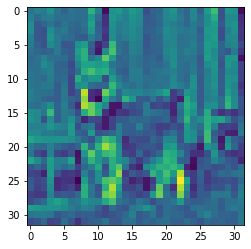

dog


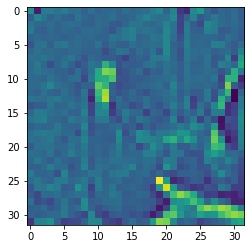

[[[ 6.5653610e-01 -1.7400866e+00 -2.3054479e-01]
  [-1.3692228e+00 -2.6453385e+00 -1.0005172e+00]
  [ 2.6335153e-01  2.6976055e-01  2.9890200e-01]
  ...
  [-1.9506365e-01  8.2710707e-01 -7.0677698e-01]
  [-6.5110669e-02  7.2784537e-01 -4.0040791e-01]
  [-3.4390050e-01  4.2568317e-01 -5.7724130e-01]]

 [[-3.0085382e-01 -1.5290569e+00 -5.4875886e-01]
  [ 4.5044819e-01  1.4646900e-01  1.9730945e-01]
  [ 1.3590722e-01  2.6802558e-01  4.4307415e-03]
  ...
  [-1.9217163e-01  4.9845040e-01 -3.2697079e-01]
  [-2.6052946e-02  5.1021320e-01 -1.2047793e-01]
  [-3.0883378e-01  3.0332562e-01 -3.6013398e-01]]

 [[ 8.5160159e-02  2.6225340e-01  1.2081059e-01]
  [-7.4243814e-02  5.5744511e-01 -1.0795003e-03]
  [-1.5610375e-01  6.2095654e-01 -4.1853091e-01]
  ...
  [-1.1196150e-01  6.5937001e-01 -1.5846679e-02]
  [-3.6496967e-02  7.0003271e-01 -1.4779510e-01]
  [-2.1979560e-01  4.6725789e-01 -5.3821075e-01]]

 ...

 [[-3.0401859e-01  6.0338359e-02 -9.3057267e-02]
  [-1.9233355e-01  1.9168307e-01  1.663

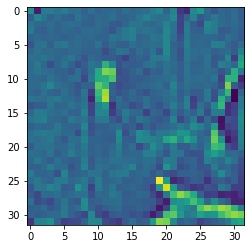

bird


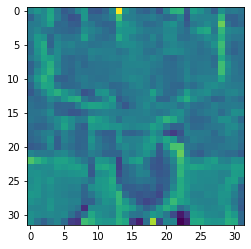

[[[ 0.09769023  0.14934288  0.07510046]
  [ 0.3743342   0.4327198   0.3608856 ]
  [ 0.15346792  0.19144538  0.08698139]
  ...
  [-0.1311657  -0.16547361 -0.24040899]
  [-0.07056101 -0.09818552 -0.06841958]
  [-0.1955054  -0.25221193 -0.1368935 ]]

 [[-0.46432096 -0.3845373  -0.4230025 ]
  [-0.02137261  0.05519575  0.06984308]
  [ 0.1997734   0.24736232  0.23651305]
  ...
  [-0.4747485  -0.41549647 -0.37123755]
  [-0.4977408  -0.43152118 -0.29552966]
  [-0.3004961  -0.2871308  -0.11257431]]

 [[-0.09084501  0.00241011 -0.0401045 ]
  [-0.04275003  0.06477649  0.08455514]
  [ 0.15686572  0.16479334  0.17145789]
  ...
  [-0.23543493 -0.27201214 -0.24836633]
  [-0.49342215 -0.46082258 -0.37442866]
  [-0.36952594 -0.35411945 -0.17035742]]

 ...

 [[ 0.12152024 -0.1402531  -0.2878677 ]
  [ 0.10957    -0.06055012 -0.19051857]
  [ 0.13610666  0.05346186 -0.15755855]
  ...
  [ 0.51876104  0.67078483  0.82539165]
  [ 0.02438799 -0.23766336 -0.4782226 ]
  [-0.6235178  -1.2261927  -1.6889354 ]]

 [

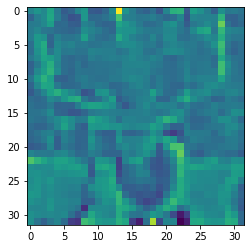

deer


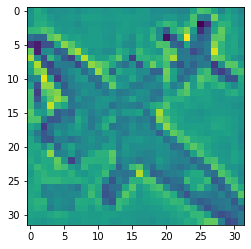

[[[-0.06189805  0.26386467 -0.13962616]
  [ 0.23195326  0.26613495  0.07241367]
  [ 0.07375993  0.16685791  0.331331  ]
  ...
  [ 0.10783379  0.04228804 -0.23024987]
  [-0.03660395  0.1006657  -0.4740408 ]
  [-0.20865847  0.08067301 -0.6617449 ]]

 [[-0.01095996  0.30949053 -0.10807545]
  [ 0.21223365  0.3433413   0.03677786]
  [ 0.18697603  0.24378581  0.28772965]
  ...
  [ 0.1874252   0.12397721 -0.11732104]
  [ 0.04500826  0.17171964 -0.20605992]
  [-0.07751359  0.24412875 -0.37303817]]

 [[-0.03532041  0.24024904 -0.21454921]
  [ 0.23797373  0.4400554   0.04689818]
  [ 0.2542946   0.31208867  0.22595195]
  ...
  [ 0.2919271   0.20546429  0.00179008]
  [ 0.02035484  0.15238582 -0.14727536]
  [-0.08050166  0.18299906 -0.3522931 ]]

 ...

 [[ 0.15297261 -0.10603673 -0.36783642]
  [ 0.26898608  0.06956373 -0.01299957]
  [ 0.22306353  0.04690199  0.06759387]
  ...
  [-0.2987991   0.37490016 -0.2906089 ]
  [-0.45059586  0.00577264 -0.2728901 ]
  [-0.60823953 -0.65978706 -0.7390801 ]]

 [

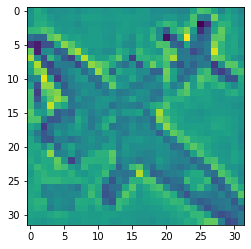

plane


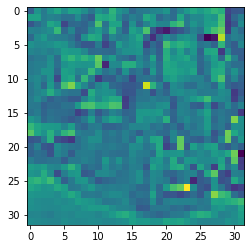

[[[-0.57596403 -0.9211809  -0.563164  ]
  [ 0.27681252 -0.02433609  0.12640929]
  [-0.15477644 -0.49833313 -0.2567301 ]
  ...
  [-1.0206974  -1.0335847  -0.71337986]
  [-0.72722834 -0.67996275 -0.9239235 ]
  [-0.6820084  -0.7262441  -1.0988048 ]]

 [[ 0.5226872   0.30482146  0.5030702 ]
  [ 0.54048765  0.3578073   0.27606001]
  [-0.11734991 -0.32891056 -0.35689726]
  ...
  [-1.0970254  -1.1382903  -0.90261614]
  [-0.4427108  -0.41959625 -0.67955804]
  [-0.05594607 -0.13094719 -0.53043896]]

 [[-0.7462393  -0.84863967 -0.88759065]
  [-0.3703871  -0.4244261  -0.78897476]
  [-0.05856525 -0.14563642 -0.4300028 ]
  ...
  [-1.1753044  -1.2974657  -1.2550263 ]
  [-0.71220326 -0.7255414  -1.1067791 ]
  [ 0.12589282  0.0505187  -0.3726157 ]]

 ...

 [[ 0.20815884  0.18582259  0.34091172]
  [ 0.17182918  0.21585384  0.23853225]
  [ 0.09278279  0.24905537  0.1762415 ]
  ...
  [ 0.14695705  0.26973397  0.02045573]
  [ 0.12030607  0.23797898 -0.0175673 ]
  [ 0.5789485   0.6544999   0.48944724]]

 [

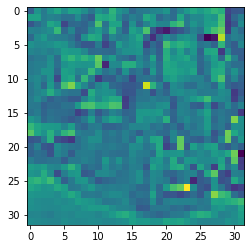

truck


In [47]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
for i in range(29):
    img = images[i].numpy()
    # print(img.shape)
    img = numpy.transpose(img, [1,2,0]) 
    # img = img.reshape(32,32,3)
    # print(img.shape)
    # plt.imshow(img[:,:,0])
#     print(img.shape)
    fig=plt.figure()
    plt.imshow(img[:,:,0])
    plt.show()
    plt.close()
    print(img)
    img += 255
    print(img)
    fig=plt.figure()
    plt.imshow(img[:,:,0])
    plt.show()
    plt.close()
    print(classes[labels[i].numpy()])


In [ ]:

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.classifier = nn.Sequential(
                nn.Conv2d(3, 192, kernel_size=5, stride=1, padding=2),
                nn.ReLU(inplace=True),
                nn.Conv2d(192, 160, kernel_size=1, stride=1, padding=0),
                nn.ReLU(inplace=True),
                nn.Conv2d(160,  96, kernel_size=1, stride=1, padding=0),
                nn.ReLU(inplace=True),
                nn.MaxPool2d(kernel_size=3, stride=2, padding=1),
                nn.Dropout(0.5),

                nn.Conv2d(96, 192, kernel_size=5, stride=1, padding=2),
                nn.ReLU(inplace=True),
                nn.Conv2d(192, 192, kernel_size=1, stride=1, padding=0),
                nn.ReLU(inplace=True),
                nn.Conv2d(192, 192, kernel_size=1, stride=1, padding=0),
                nn.ReLU(inplace=True),
                nn.AvgPool2d(kernel_size=3, stride=2, padding=1),
                nn.Dropout(0.5),

                nn.Conv2d(192, 192, kernel_size=3, stride=1, padding=1),
                nn.ReLU(inplace=True),
                nn.Conv2d(192, 192, kernel_size=1, stride=1, padding=0),
                nn.ReLU(inplace=True),
                nn.Conv2d(192,  10, kernel_size=1, stride=1, padding=0),
                nn.ReLU(inplace=True),
                nn.AvgPool2d(kernel_size=8, stride=1, padding=0),

                )

    def forward(self, x):
        x = self.classifier(x)
        x = x.view(x.size(0), 10)
        return x



In [ ]:
model = Net()
print(model)
model.cuda()

In [ ]:
pretrained=True
if pretrained:
    model.load_state_dict(torch.load('../../../datasets/nin-cifar10-Model.ckpt'))
else:
    for m in model.modules():
        if isinstance(m, nn.Conv2d):
            m.weight.data.normal_(0, 0.05)
            m.bias.data.zero_()

In [ ]:
# for name, p in model.named_modules():
#     if isinstance(p, nn.Conv2d):
#         print(p.weight)

In [ ]:
# for i in model.named_parameters():
#     print(i[0])

In [ ]:
criterion = nn.CrossEntropyLoss()
param_dict = dict(model.named_parameters())
params = []

base_lr = 0.1
for key, value in param_dict.items():
    if key == 'classifier.20.weight':
        params += [{'params':[value], 'lr':0.1 * base_lr, 
            'momentum':0.95, 'weight_decay':0.0001}]
    elif key == 'classifier.20.bias':
        params += [{'params':[value], 'lr':0.1 * base_lr, 
            'momentum':0.95, 'weight_decay':0.0000}]
    elif 'weight' in key:
        params += [{'params':[value], 'lr':1.0 * base_lr,
            'momentum':0.95, 'weight_decay':0.0001}]
    else:
        params += [{'params':[value], 'lr':2.0 * base_lr,
            'momentum':0.95, 'weight_decay':0.0000}]
optimizer = torch.optim.SGD(params, lr=0.1, momentum=0.9)

In [ ]:
# optimizer

In [ ]:
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(trainloader):
        data, target = data.cuda(), target.cuda()
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\tLR: {}'.format(
                epoch, batch_idx * len(data), len(trainloader.dataset),
                100. * batch_idx / len(trainloader), loss.data.item(),
                optimizer.param_groups[1]['lr']))
            

def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in testloader:
        data, target = data.cuda(), target.cuda()
        output = model(data)
        test_loss += criterion(output, target).data.item()
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(testloader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss * 128., correct, len(testloader.dataset),
        100. * correct / len(testloader.dataset))	)

def adjust_learning_rate(optimizer, epoch):
    if epoch%80==0:
        for param_group in optimizer.param_groups:
            param_group['lr'] = param_group['lr'] * 0.1

def print_std():
    for m in model.modules():
        if isinstance(m, nn.Conv2d):
            print(torch.std(m.weight.data))

In [ ]:
test()

In [ ]:
train(0)

In [ ]:
for epoch in range(1, 320):
    print('epoch:{}'.format(epoch))
    adjust_learning_rate(optimizer, epoch)
    train(epoch)
    test()

## 保存模型

In [ ]:
torch.save(model.state_dict(), '../../../datasets/nin-cifar10-Model.ckpt')